In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import pylab as plt

from astropy.time import Time

import sys
sys.path.append('/home/scratch/psalas/LASSI/lassi-analysis_v2')

from plotting import nicePlotDates

In [3]:
mjds, zin, zinval, zobs, eta_res = np.loadtxt("March2020_Ci_in_out_no_align.txt", unpack=True)
time = Time(mjds, format='mjd')
eta_tot = 0.21932075789662847

In [44]:
sc.legend_elements?

<IPython.core.display.Javascript object>


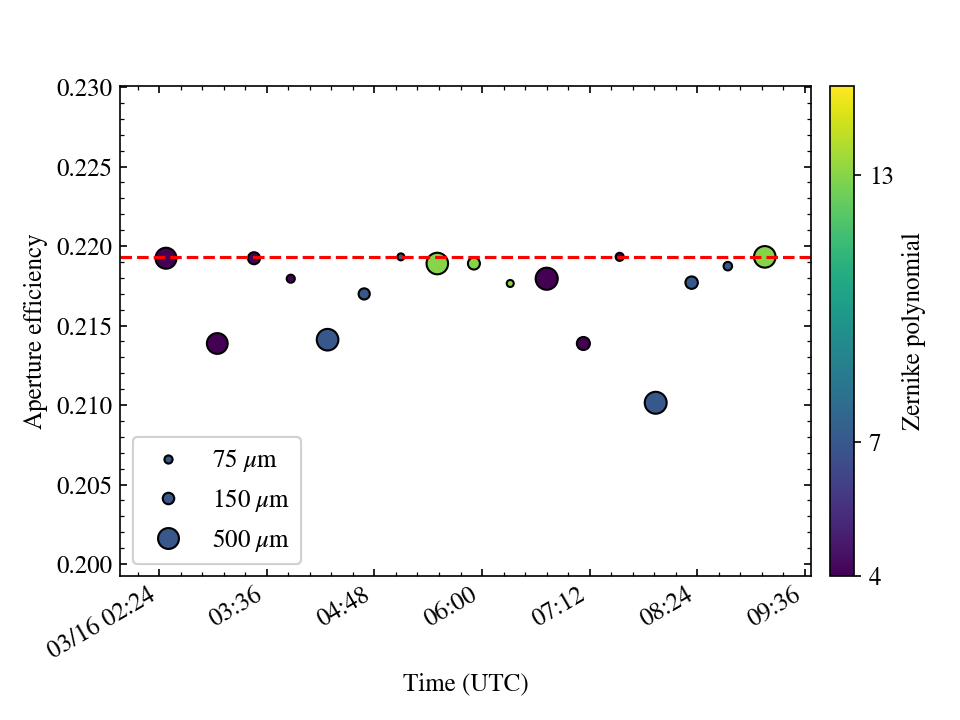

In [58]:
from matplotlib.dates import DateFormatter
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rc('font', **{'family':'STIXGeneral', 'weight':'normal'})
matplotlib.rc('text', usetex=False)
matplotlib.rcParams.update({'font.size': 12})

formatter = DateFormatter('%m/%d %H:%M')

fig = plt.figure(dpi=150, frameon=False)

ax = fig.add_subplot(111)
#axr = ax.twinx()

ax.axhline(y=eta_tot, color='r', linestyle='--')

#nw = (w[1:-5] - np.min(w[1:-5]))/(np.max(w[1:-5]) - np.min(w[1:-5]))
zc = zin
vmax = 15
vmin = 4
cmap = plt.cm.viridis
norm = plt.matplotlib.colors.Normalize(vmin, vmax, clip=True)
colors = norm(zc)
colors = cmap(colors)
mapper = plt.matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
# Now set the alpha channel to the one we created above
#colors[..., -1] = 1. - nw

sc = ax.scatter(time.plot_date, eta_res, c=colors, s=abs(zinval)/5., marker='o', edgecolors='k', label='test')

# Plot legend.
tkr = plt.matplotlib.ticker.FixedLocator([75,150,500])
legend1 = ax.legend(*sc.legend_elements(prop='sizes', num=tkr, func=lambda x:5*x, 
                                        color=mapper.to_rgba(7), mec='k', fmt=r'${x}~\mu$m'),
                    loc="lower left")
ax.add_artist(legend1)


cb = plt.colorbar(sc, fraction=0.046, pad=0.025, ticks=[norm(i) for i in np.unique(zc)])
cb.ax.set_yticklabels(np.unique(zc).astype(np.int))
cb.set_label('Zernike polynomial')

ax.minorticks_on()
ax.tick_params('both', direction='in', which='both', top=True, right=True, left=True, bottom=True)
ax.set_ylabel("Aperture efficiency")

ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('Time (UTC)')

"""
# Set the right axis labels.
l = ax.get_ylim()
l2 = axr.get_ylim()
f = lambda x : l2[0]+(x-l[0])/(l[1]-l[0])*(l2[1]-l2[0])
ticks = f(ax.get_yticks())
axr.yaxis.set_major_locator(plt.matplotlib.ticker.FixedLocator(ticks))

labels = ["{:.2f}".format((np.power(eta_/np.nanmax(eta_tot), -2.) - 1)*100.) for eta_ in ax.get_yticks()]
axr.set_yticklabels(labels)
axr.set_ylabel("$\Delta t_{\mathrm{tot}}$ (%)")
axr.minorticks_on()
axr.tick_params('both', direction='in', which='both', top=False, right=True, left=False, bottom=False)
axr.yaxis.set_minor_locator(plt.matplotlib.ticker.AutoMinorLocator(5))
"""

fig.autofmt_xdate()

# Update tick labels.
fig.canvas.draw()
fig.canvas.flush_events()
labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = nicePlotDates(labels, i0=1)
ax.set_xticklabels(new_labels)

plt.savefig("eta_scan_March2020_tilt_sub.pdf", bbox_inches='tight', pad_inches=0.06)

<IPython.core.display.Javascript object>


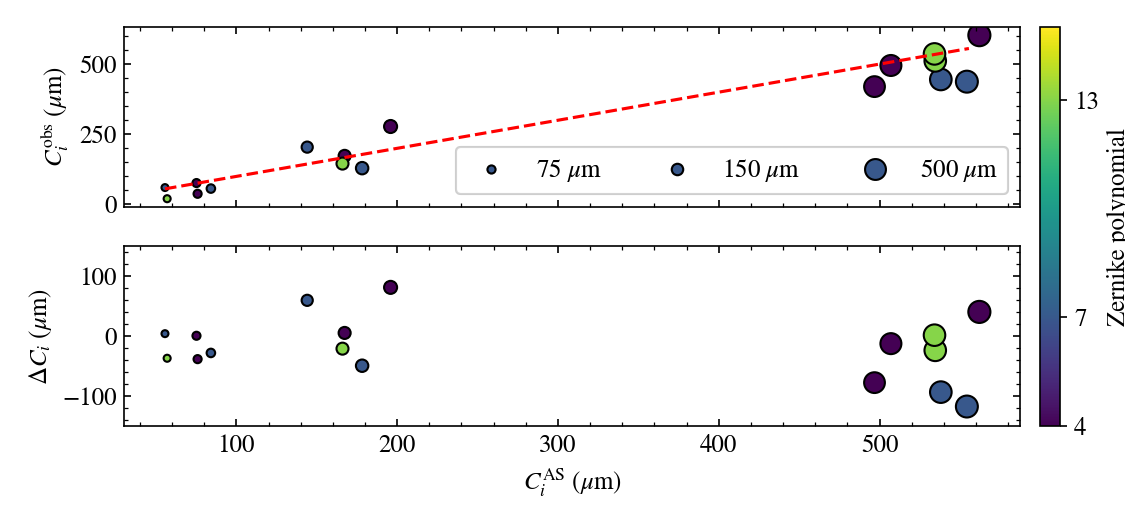

/home/scratch/psalas/LASSI/lassi-analysis_v2/psalas_lassi_env/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [57]:
fig = plt.figure(dpi=150, frameon=False, figsize=(7.5,3.5))

ax1 = fig.add_subplot(211)

sc = ax1.scatter(abs(zinval), abs(zobs), c=colors, s=abs(zinval)/5., marker='o', edgecolors='k')

tkr = plt.matplotlib.ticker.FixedLocator([75,150,500])
legend1 = ax1.legend(*sc.legend_elements(prop='sizes', num=tkr, func=lambda x:5*x, 
                                        color=mapper.to_rgba(7), mec='k', fmt=r'${x}~\mu$m'),
                    loc="lower right", ncol=3)
ax1.add_artist(legend1)

x = np.arange(np.min(-1*zinval),np.max(-1*zinval),10)
y = x
ax1.plot(x, y, 'r--')

#cb = plt.colorbar(sc, fraction=0.046, pad=0.05, ticks=[norm(i) for i in np.unique(zc)])
#cb.ax.set_yticklabels(np.unique(zc).astype(np.int))
#cb.set_label('Zernike polynomial')

ax1.minorticks_on()
ax1.tick_params('both', direction='in', which='both', top=True, right=True, left=True, bottom=True)

ax1.set_ylabel("$C_{i}^{\mathrm{obs}}$ ($\mu$m)")
ax1.set_xticklabels([])

ax2 = fig.add_subplot(212)

sc = ax2.scatter(abs(zinval), abs(zobs) - abs(zinval), c=colors, s=abs(zinval)/5., marker='o', edgecolors='k')

ax2.minorticks_on()
ax2.tick_params('both', direction='in', which='both', top=True, right=True, left=True, bottom=True)

ax2.set_ylim(-150, 150)

ax2.set_ylabel("$\Delta C_{i}$ ($\mu$m)")
ax2.set_xlabel("$C_{i}^{\mathrm{AS}}$ ($\mu$m)")

fig.tight_layout()

#cax,kw = plt.matplotlib.colorbar.make_axes([ax1, ax2])
cb = plt.colorbar(sc, ax=[ax1, ax2], fraction=0.06, pad=-0.14, ticks=[norm(i) for i in np.unique(zc)])
cb.ax.set_yticklabels(np.unique(zc).astype(np.int))
cb.set_label('Zernike polynomial')

fig.tight_layout()

plt.savefig("Cis_March2020_tilt_sub.pdf", bbox_inches='tight', pad_inches=0.06)

In [71]:
residuals = abs(zobs)-abs(zinval)

In [86]:
residuals_perc = (abs(zobs)-abs(zinval))/abs(zinval)*100.

In [87]:
residuals.mean(), residuals.std(), residuals_perc.mean()

(-17.46495640320614, 49.7705577910912, -8.384333643933115)

In [85]:
print(np.power(np.mean(eta_res)/eta_tot, -2))
print(np.power(np.min(eta_res)/eta_tot, -2))

1.0191888063246783
1.089263511317817


In [84]:
print(100. - (np.mean(eta_res))/eta_tot*100.)
print(100. - (np.min(eta_res))/eta_tot*100.)

0.9458495834837066
4.184995977813813


In [75]:
mask = (abs(zinval) > 400)
abs(zinval)[mask].std()

21.734528304375775

In [76]:
3e9/115e9

0.02608695652173913

In [ ]:
np.power()